<a href="https://colab.research.google.com/github/neklyud/pytorch-tutorial/blob/master/pytorch_tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True, 
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False, 
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:04, 41141714.71it/s]                               


Files already downloaded and verified


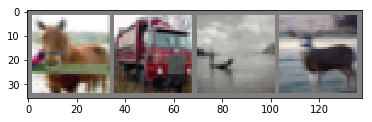

horse truck  ship  deer


In [0]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

# функция для показа изображения

def imshow(img):
    img = img / 2 + 0.5     # денормализуем
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# получаем несколько случайных тренировочных изображений
dataiter = iter(trainloader)
images, labels = dataiter.next()

# показываем изображения
imshow(torchvision.utils.make_grid(images))
# печатаем метки
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
#Тренировка сети

for epoch in range(2):
  
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
print('Тренировка завершена')


[1,  2000] loss: 2.237
[1,  4000] loss: 1.887
[1,  6000] loss: 1.682
[1,  8000] loss: 1.575
[1, 10000] loss: 1.493
[1, 12000] loss: 1.470
[2,  2000] loss: 1.411
[2,  4000] loss: 1.356
[2,  6000] loss: 1.339
[2,  8000] loss: 1.350
[2, 10000] loss: 1.295
[2, 12000] loss: 1.308
Тренировка завершена


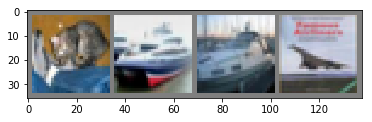

GroundTruth:    cat  ship  ship plane


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# печатаем изображения
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', 
      ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)


In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird  ship plane plane


In [0]:
# -*- coding: utf-8 -*-

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Аккуратность сети на 10000 тестовых изображений: %d %%' % (
    100 * correct / total))

Аккуратность сети на 10000 тестовых изображений: 52 %


In [0]:
# -*- coding: utf-8 -*-

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Аккуратность %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Аккуратность plane : 58 %
Аккуратность   car : 51 %
Аккуратность  bird : 66 %
Аккуратность   cat : 25 %
Аккуратность  deer : 25 %
Аккуратность   dog : 36 %
Аккуратность  frog : 74 %
Аккуратность horse : 49 %
Аккуратность  ship : 67 %
Аккуратность truck : 72 %


In [0]:
print(trainloader)